#Matplotlib

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

##위에꺼 실행후 반드시 런타임 다시시작하기

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')
# %matplotlib inline  주피터 노느북에서 그래프를 볼 때 사용하는 매직명령어

##Bar Chart
- x데이터가 카테고리 값인경우

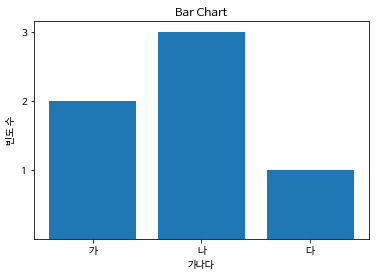

In [2]:
import matplotlib as mpl
import matplotlib.pylab as plt

y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

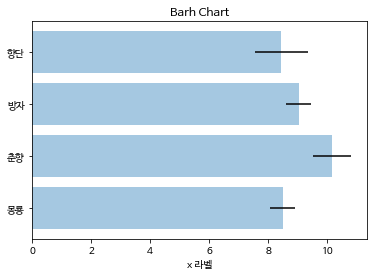

In [3]:
np.random.seed(0)

people = ['몽룡', '춘향', '방자', '향단']
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title("Barh Chart")
plt.barh(y_pos, performance, xerr=error, alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('x 라벨')
plt.show()

#타이타닉의 선실별 승객수

In [4]:
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
s = titanic['class'].value_counts()

In [7]:
df = titanic[['class', 'pclass']].groupby('class').count()
df


,pclass
class,
First,216
Second,184
Third,491


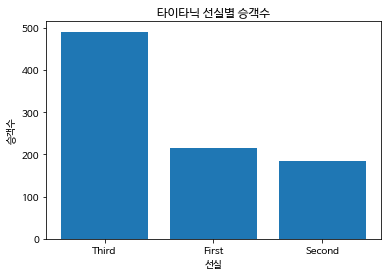

In [12]:
y = s.values
x = np.arange(len(y))
xlabel = s.index.to_list()

plt.title('타이타닉 선실별 승객수')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel('선실')
plt.ylabel('승객수')
plt.show()

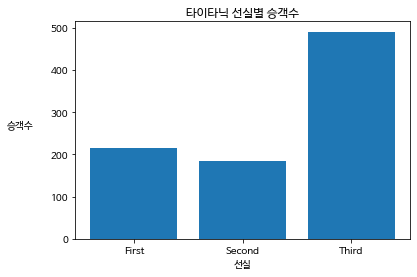

In [20]:
y = df.pclass.values
x = np.arange(len(y))
xlabel = df.index.to_list()

plt.title('타이타닉 선실별 승객수')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel('선실')
plt.ylabel('승객수', rotation=0, labelpad= 30)
plt.show()

#2 . 파이차트

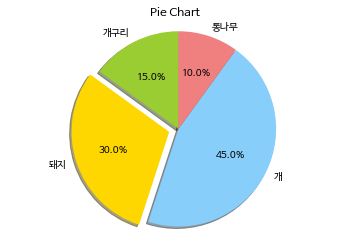

In [21]:
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
plt.title("Pie Chart", fontsize=15)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

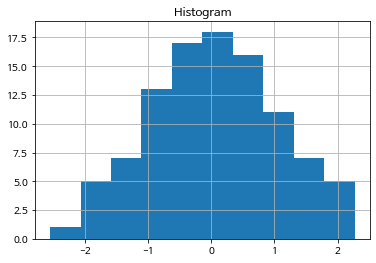

In [25]:
np.random.seed(0)
x = np.random.randn(100)
                    
plt.title("Histogram")
arrays, bins, patches = plt.hist(x, bins=10)
plt.grid()
plt.show()

In [27]:
arrays

array([ 1.,  5.,  7., 13., 17., 18., 16., 11.,  7.,  5.])

In [26]:
bins

array([-2.55298982, -2.07071537, -1.58844093, -1.10616648, -0.62389204,
       -0.1416176 ,  0.34065685,  0.82293129,  1.30520574,  1.78748018,
        2.26975462])

##4. 산점도 (scatter plot)
- 두개의 실수 데이터 집합의 상관관계를 살펴볼 때 사용

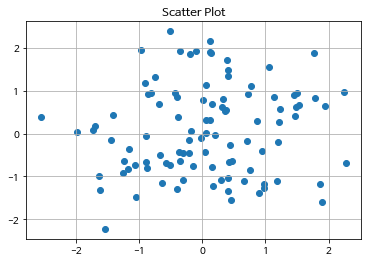

In [29]:
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y, )
plt.grid()
plt.show()

#Anscombe's Quartet

In [30]:
import seaborn as sns
ans = sns.load_dataset('anscombe')
ans.shape

(44, 3)

In [31]:
ans.groupby('dataset').describe()

x                           ...     y                          
        count mean       std  min  25%  ...   min    25%   50%   75%    max
dataset                                 ...                                
I        11.0  9.0  3.316625  4.0  6.5  ...  4.26  6.315  7.58  8.57  10.84
II       11.0  9.0  3.316625  4.0  6.5  ...  3.10  6.695  8.14  8.95   9.26
III      11.0  9.0  3.316625  4.0  6.5  ...  5.39  6.250  7.11  7.98  12.74
IV       11.0  9.0  3.316625  8.0  8.0  ...  5.25  6.170  7.04  8.19  12.50

[4 rows x 16 columns]

- Dataset 에 대해서 산점도와 회귀선 그리기

In [33]:
ds1 = ans[ans.dataset == 'I']
ds1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


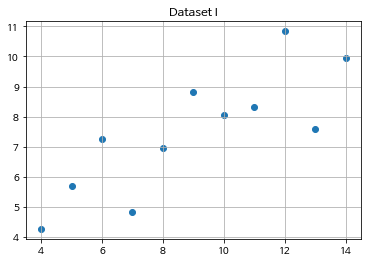

In [35]:
plt.scatter(ds1.x, ds1.y)
plt.grid()
plt.title('Dataset I')
plt.show()

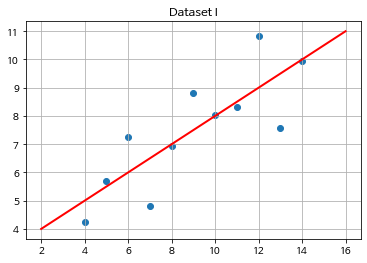

In [39]:
plt.scatter(ds1.x, ds1.y)
plt.plot([2, 16], [4, 11], c='r', lw=2)
plt.grid()
plt.title('Dataset I')
plt.show()

- 4개의 데이터셋 모두에 대해서 그림

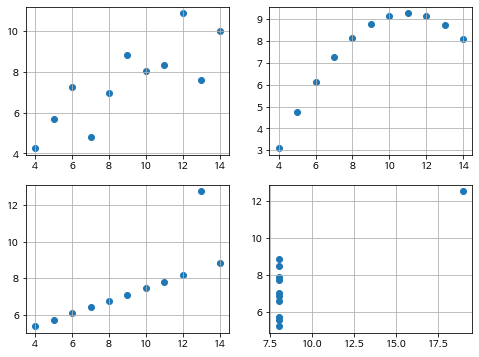

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for i, roma in enumerate(['I', 'II', 'III', 'IV']):
    ds = ans[ans.dataset == roma]
    ax = axes[i//2, i%2] 
    ax.scatter(ds.x, ds.y)
    ax.grid()

plt.show()



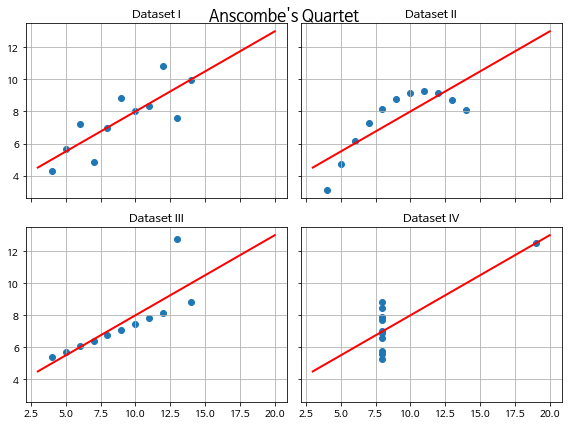

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6),
                         sharex=True, sharey=True)

for i, roma in enumerate(['I', 'II', 'III', 'IV']):
    ds = ans[ans.dataset == roma]
    ax = axes[i//2, i%2] 
    ax.scatter(ds.x, ds.y)
    ax.plot([3, 20], [4.5, 13], 'r-', lw=2) #회귀선 y=0.5*x+3
    ax.set_title(f'Dataset {roma}')
    ax.grid()
fig.suptitle("Anscombe's Quartet", fontsize = 16)
plt.tight_layout()
plt.show()


#Imshow

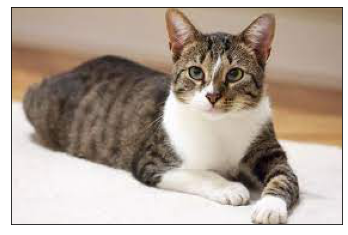

In [44]:
import matplotlib.image as img
image = img.imread('cat.jfif')
plt.imshow(image)
plt.xticks([]); plt.yticks([])
plt.show()

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

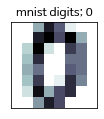

In [47]:
plt.title("mnist digits; 0")
plt.imshow(X, interpolation='nearest', cmap=plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left=0.35, right=0.65, bottom=0.35, top=0.65)
plt.show()

#Matplotlib 박스플랏그리기

##Box Plot

In [59]:
iris = sns.load_dataset('iris')
iris.head()
iris.species.values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

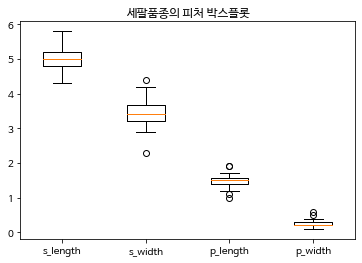

In [52]:
#setosa 품종의 각 feature의 box 플롯
setosa = iris[iris.species == 'setosa']
plt.boxplot([setosa.sepal_length, setosa.sepal_width,
             setosa.petal_length, setosa.petal_width], labels=['s_length', 's_width','p_length', 'p_width',])
plt.title('세팔품종의 피처 박스플롯')
plt.show()

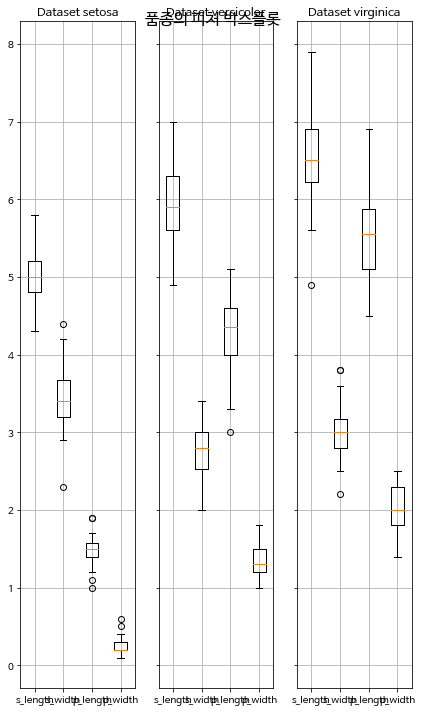

In [73]:
#내가 만든것 
fig, axes = plt.subplots(1, 3, figsize=(6, 10), sharey=True)
for i, spc in enumerate(['setosa', 'versicolor', 'virginica']):
    ds = iris[iris.species == spc ]
    ax = axes[i] 
    ax.boxplot([ds.sepal_length, ds.sepal_width,
             ds.petal_length, ds.petal_width], labels=['s_length', 's_width','p_length', 'p_width'])
    
    ax.set_title(f'Dataset {spc}')
    ax.grid()
fig.suptitle("품종의 피처 박스플롯", fontsize = 16)
plt.tight_layout()
plt.show()

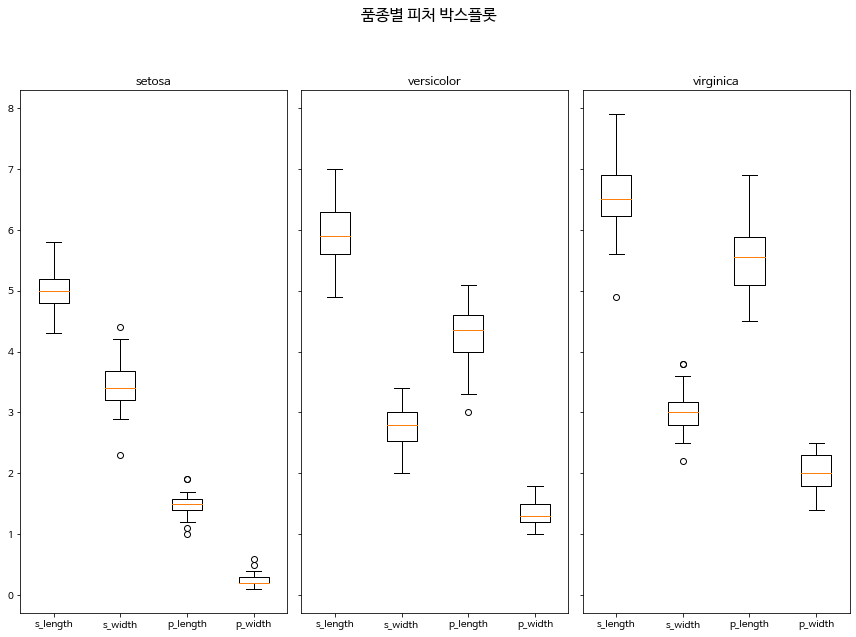

In [71]:
#선생님정답 만든것 
fig, axes = plt.subplots(1, 3, figsize=(12, 8), sharey=True)
for i, spc in enumerate(['setosa', 'versicolor', 'virginica']):
    sub = iris[iris.species == spc ]
    ax = axes[i] 
    ax.boxplot([sub.sepal_length, sub.sepal_width, sub.petal_length, sub.petal_width], labels=['s_length', 's_width','p_length', 'p_width'])   
    ax.set_title(spc)
 
fig.suptitle('품종별 피처 박스플롯', fontsize = 16, y= 1.1)
plt.tight_layout()
plt.show()